In [48]:
%pip install tensorflow scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [101]:
OPTIMIZER = "adam"
LOSS = "binary_crossentropy"
METRICS = ["accuracy", "mae"]
EPOCHS = 30
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

In [102]:
df = pd.read_csv("data/clean.csv").drop(columns=["Unnamed:6"], errors="ignore")
print(df.shape)
df.columns

(607622, 31)


Index(['duration', 'log_duration', 'until_working_time', 'avg_star',
       'post_finish_percentage', 'avg_duration_minutes_finished', 'ป้าย',
       'ความสะอาด', 'แสงสว่าง', 'สอบถาม', 'ร้องเรียน', 'การเดินทาง', 'จราจร',
       'ท่อระบายน้ำ', 'สะพาน', 'เสียงรบกวน', 'ต้นไม้', 'คนจรจัด', 'คลอง',
       'ถนน', 'เสนอแนะ', 'กีดขวาง', 'สายไฟ', 'PM2.5', 'น้ำท่วม', 'ทางเท้า',
       'สัตว์จรจัด', 'ความปลอดภัย', 'ห้องน้ำ', 'ป้ายจราจร', 'Others'],
      dtype='object')

In [103]:
df["until_working_time"].value_counts()

until_working_time
0       161036
874        574
947        566
951        564
856        559
         ...  
1794         1
3200         1
1787         1
1726         1
1798         1
Name: count, Length: 3957, dtype: int64

In [104]:
df["avg_duration_minutes_finished"].describe()

count    607622.000000
mean      92885.756482
std       31119.914592
min       21258.000000
25%       70127.000000
50%       88501.000000
75%      110865.500000
max      214286.000000
Name: avg_duration_minutes_finished, dtype: float64

In [111]:
X = df.drop(columns=["log_duration", "duration"])
y = df["log_duration"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=699
)

In [112]:
OPTIMIZER = "adam"
LOSS = "mse"
METRICS = ["mae", "mse"]
EPOCHS = 30
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(X.shape[1],)),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(8, activation="relu"),
        Dense(1),
    ]
)

model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
)

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12153/12153 ━━━━━━━━━━━━━━━━━━━━ 7s 484us/step - loss: 5.3568 - mae: 1.7352 - mse: 5.3568 - val_loss: 3.4291 - val_mae: 1.5207 - val_mse: 3.4291
Epoch 2/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 439us/step - loss: 3.3971 - mae: 1.5264 - mse: 3.3971 - val_loss: 3.4127 - val_mae: 1.5105 - val_mse: 3.4127
Epoch 3/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 446us/step - loss: 3.3328 - mae: 1.5100 - mse: 3.3328 - val_loss: 3.3109 - val_mae: 1.5022 - val_mse: 3.3109
Epoch 4/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 439us/step - loss: 3.2896 - mae: 1.4978 - mse: 3.2896 - val_loss: 3.2517 - val_mae: 1.4810 - val_mse: 3.2517
Epoch 5/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 440us/step - loss: 3.2450 - mae: 1.4868 - mse: 3.2450 - val_loss: 3.2200 - val_mae: 1.4851 - val_mse: 3.2200
Epoch 6/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 442us/step - loss: 3.2310 - mae: 1.4826 - mse: 3.2310 - val_loss: 3.2404 - val_mae: 1.4879 - val_mse: 3.2404
Epoch 7/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 437us/step - loss: 3.2064 - 

In [113]:
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - loss: 3.1637 - mae: 1.4617 - mse: 3.1637
Loss: 3.1644327640533447
MAE: 1.4629762172698975
MSE: 3.1644327640533447


3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step


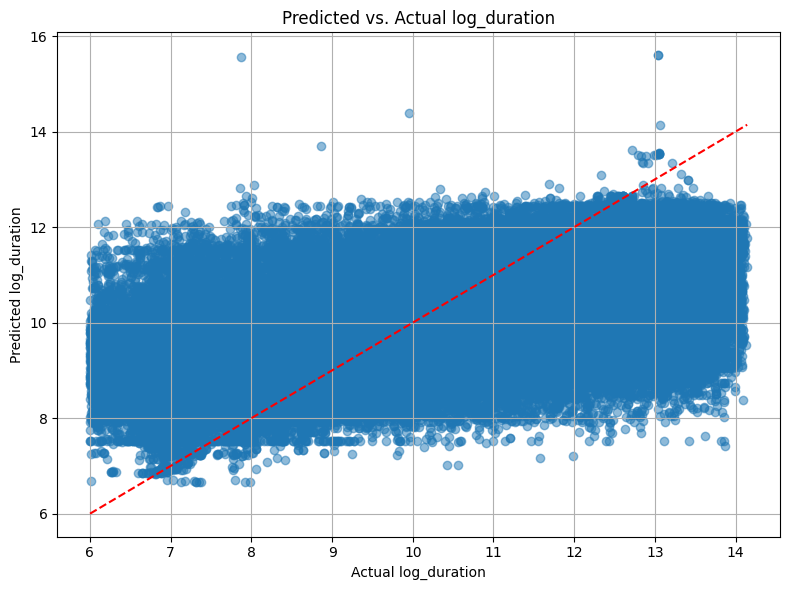

In [114]:
y_pred = model.predict(X_test).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual log_duration")
plt.ylabel("Predicted log_duration")
plt.title("Predicted vs. Actual log_duration")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # y=x line
plt.grid(True)
plt.tight_layout()
plt.show()

In [109]:
df.columns

Index(['duration', 'log_duration', 'until_working_time', 'avg_star',
       'post_finish_percentage', 'avg_duration_minutes_finished', 'ป้าย',
       'ความสะอาด', 'แสงสว่าง', 'สอบถาม', 'ร้องเรียน', 'การเดินทาง', 'จราจร',
       'ท่อระบายน้ำ', 'สะพาน', 'เสียงรบกวน', 'ต้นไม้', 'คนจรจัด', 'คลอง',
       'ถนน', 'เสนอแนะ', 'กีดขวาง', 'สายไฟ', 'PM2.5', 'น้ำท่วม', 'ทางเท้า',
       'สัตว์จรจัด', 'ความปลอดภัย', 'ห้องน้ำ', 'ป้ายจราจร', 'Others'],
      dtype='object')

Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12153/12153 ━━━━━━━━━━━━━━━━━━━━ 6s 438us/step - loss: 36601118720.0000 - mae: 118102.3516 - mse: 36601118720.0000 - val_loss: 34796003328.0000 - val_mae: 120088.4062 - val_mse: 34796003328.0000
Epoch 2/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 6s 452us/step - loss: 35068006400.0000 - mae: 119789.3125 - mse: 35068006400.0000 - val_loss: 34737016832.0000 - val_mae: 117266.7578 - val_mse: 34737016832.0000
Epoch 3/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 430us/step - loss: 34422706176.0000 - mae: 118362.0234 - mse: 34422706176.0000 - val_loss: 34742976512.0000 - val_mae: 122293.5625 - val_mse: 34742976512.0000
Epoch 4/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 432us/step - loss: 35014041600.0000 - mae: 119691.2344 - mse: 35014041600.0000 - val_loss: 34587774976.0000 - val_mae: 118499.4844 - val_mse: 34587774976.0000
Epoch 5/30
12153/12153 ━━━━━━━━━━━━━━━━━━━━ 5s 437us/step - loss: 34724388864.0000 - mae: 118973.1562 - mse: 34724388864.0000 - val_loss: 34352404480.0000 - val_mae: 117900.7188 - val_mse

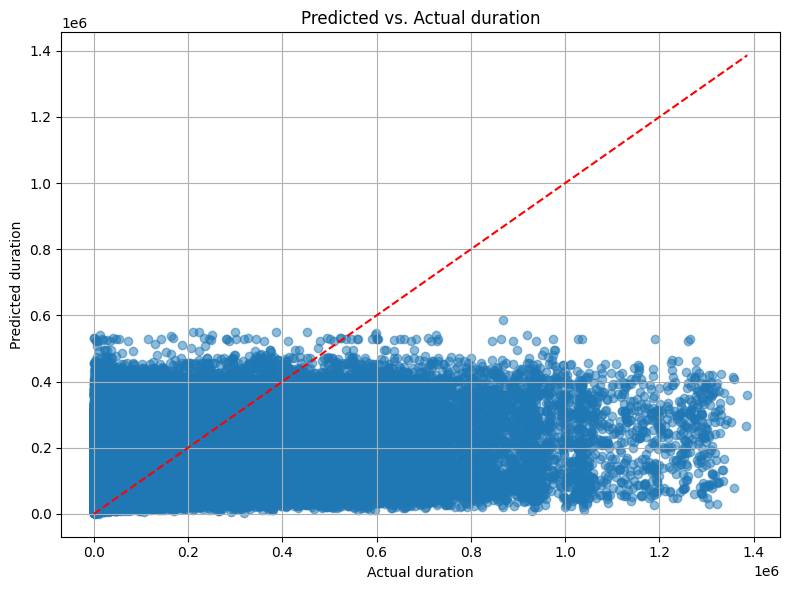

In [115]:
X = df.drop(columns=["duration", "log_duration"])
y = df["duration"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=699
)

OPTIMIZER = "adam"
LOSS = "mse"
METRICS = ["mae", "mse"]
EPOCHS = 30
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(X.shape[1],)),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(8, activation="relu"),
        Dense(1),
    ]
)

model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
)

loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

y_pred = model.predict(X_test).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual duration")
plt.ylabel("Predicted duration")
plt.title("Predicted vs. Actual duration")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # y=x line
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
from sklearn.inspection import permutation_importance

# Use a wrapper to make Keras model compatible
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin


class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()


wrapped_model = KerasRegressorWrapper(model)

result = permutation_importance(
    wrapped_model,
    X_test,
    y_test,
    scoring="neg_mean_squared_error",
    n_repeats=3,
    random_state=42,
)

import pandas as pd

importance_df = pd.DataFrame(
    {
        "feature": df.drop(columns=["duration"]).columns,
        "importance": result.importances_mean,
    }
).sort_values("importance", ascending=False)

importance_df["importance"] = -importance_df["importance"]
importance_df = importance_df.sort_values("importance", ascending=False)

print(importance_df)

3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 248us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 246us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 245us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 255us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 250us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 254us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 252us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 247us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 248us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 249us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 242us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 246us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 257us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 243us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 241us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 252us/step
3798/3798 ━━━━━━━━━━━━━━━━━━━━ 1s 245us/step
3798/3798 

In [117]:
for i in range(20):
    random_index = np.random.choice(len(df), size=1)[0]

    # Get the raw input row and true duration
    raw_input = df.drop(columns=["duration", "log_duration"]).iloc[random_index]
    true_duration = df["duration"].iloc[random_index]

    # Scale the input using the same scaler
    scaled_input = scaler.transform([raw_input])

    # Predict
    predicted_duration = model.predict(scaled_input).flatten()[0]

    print(f"Trial {i+1}, Index {random_index}")
    print(f"True Duration:      {true_duration}")
    print(f"Predicted Duration: {round(predicted_duration, 2)}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Trial 1, Index 494239
True Duration:      48902.0
Predicted Duration: 45735.078125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Trial 2, Index 286462
True Duration:      581532.0
Predicted Duration: 49040.6484375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Trial 3, Index 290148
True Duration:      217425.0
Predicted Duration: 83666.15625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have va

Trial 4, Index 67251
True Duration:      25666.0
Predicted Duration: 191238.734375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Trial 5, Index 135227
True Duration:      198704.0
Predicted Duration: 312392.125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Trial 6, Index 171685
True Duration:      3963.0
Predicted Duration: 56877.05859375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Trial 7, Index 223511
True Duration:      116870.0
Predicted Duration: 142470.890625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Trial 8, Index 188456
True Duration:      4570.0
Predicted Duration: 66013.3125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Trial 9, Index 483872
True Duration:      1215.0
Predicted Duration: 44934.96875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have va

Trial 10, Index 525440
True Duration:      4682.0
Predicted Duration: 128979.9765625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Trial 11, Index 121940
True Duration:      4430.0
Predicted Duration: 31080.150390625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Trial 12, Index 130647
True Duration:      376945.0
Predicted Duration: 210772.5625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Trial 13, Index 367074
True Duration:      2208.0
Predicted Duration: 106710.2265625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have va

Trial 14, Index 180299
True Duration:      445.0
Predicted Duration: 81424.1015625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Trial 15, Index 162782
True Duration:      87830.0
Predicted Duration: 96960.296875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Trial 16, Index 405188
True Duration:      1420.0
Predicted Duration: 93003.8515625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Trial 17, Index 40095
True Duration:      5262.0
Predicted Duration: 118356.25

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Trial 18, Index 400220
True Duration:      52482.0
Predicted Duration: 166396.25

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Trial 19, Index 427732
True Duration:      7703.0
Predicted Duration: 29883.890625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Trial 20, Index 219866
True Duration:      1751.0
Predicted Duration: 80345.65625



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
